<h1><center> Hand Drawn Pictures Classification </center></h1>

In [1]:
# Python ≥ 3.8 is required
import sys
assert sys.version_info >= (3,8)

# Scikit-Learn ≥ 0.23 is required
import sklearn
assert sklearn.__version__ >= "0.23"

# TensorFlow ≥ 2.3 and Keras ≥ 2.3 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.3"
assert keras.__version__ >= "2.3"

print("The version of your Tensorflow is "+ tf.__version__)
print("The version of your Keras is "+ keras.__version__)

The version of your Tensorflow is 2.4.1
The version of your Keras is 2.4.0


In [2]:
# Importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from functools import partial

# to make this notebook's output stable across runs
np.random.seed(5)

In [3]:
# Number of GPU used

print("Number of GPUs Available: ", len(tf.config.experimental.list_physical_devices("GPU")))

Number of GPUs Available:  1


In [4]:
# Enable memory growth

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [5]:
# importing the train and test data

trainData = np.load("./data/train_images.npy", encoding="bytes", allow_pickle=True)
testData = np.load("./data/test_images.npy", encoding="bytes", allow_pickle=True)

In [6]:
# Transforming the train data into an array

full_X_train = []
for i,j in trainData:
    full_X_train.append(j)
full_X_train = np.asarray(full_X_train)
full_X_train

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [255., 255., 255., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [7]:
# Transforming the data for submission into an array

X_newData = []
for i,j in testData:
    X_newData.append(j)
X_newData = np.asarray(X_newData)
X_newData

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
# importing the train labels

y = pd.read_csv("./data/train_labels.csv")
y = y["Category"]
y

0             shovel
1              rifle
2           scorpion
3              apple
4              spoon
            ...     
9995            pool
9996           apple
9997    rollerskates
9998           mouth
9999          pencil
Name: Category, Length: 10000, dtype: object

In [9]:
# Proportion of each class on the whole dataset

pd.Series(y).value_counts() / len(y)

mouth           0.0571
pineapple       0.0481
pool            0.0479
octagon         0.0468
moustache       0.0463
rifle           0.0440
sailboat        0.0422
skateboard      0.0420
nail            0.0410
mug             0.0382
scorpion        0.0376
rabbit          0.0369
apple           0.0368
empty           0.0323
penguin         0.0321
paintbrush      0.0314
rollerskates    0.0293
skull           0.0288
sink            0.0272
pillow          0.0268
shovel          0.0264
pencil          0.0252
rhinoceros      0.0220
panda           0.0211
parrot          0.0206
nose            0.0204
peanut          0.0199
pear            0.0188
screwdriver     0.0182
spoon           0.0182
squiggle        0.0164
Name: Category, dtype: float64

In [10]:
# reshaping the data to (batch size, height, width, number of channel)

full_X_train = full_X_train.reshape((-1, 100, 100, 1))
X_newData = X_newData.reshape((-1, 100, 100, 1))

In [11]:
# Encoding the label into numeric value

le = LabelEncoder()
y = le.fit_transform(y)
y

array([25, 20, 23, ..., 21,  3, 13])

In [12]:
# Creating a train and test set from full_X_train

X_train, X_test, y_train, y_test = train_test_split(full_X_train, y, random_state = 5, test_size = 0.20, stratify = y)

In [13]:
# Proportion of each class for the train set

pd.Series(y_train).value_counts() / len(y_train) * 100

3     5.7125
16    4.8125
17    4.7875
7     4.6750
2     4.6250
20    4.4000
22    4.2250
27    4.2000
5     4.1000
4     3.8250
23    3.7625
18    3.6875
0     3.6750
1     3.2250
14    3.2125
8     3.1375
21    2.9375
28    2.8750
26    2.7250
15    2.6750
25    2.6375
13    2.5250
19    2.2000
9     2.1125
10    2.0625
6     2.0375
11    1.9875
12    1.8750
24    1.8250
29    1.8250
30    1.6375
dtype: float64

In [14]:
# Proportion of each class for the test set

pd.Series(y_test).value_counts() / len(y_test) * 100

3     5.70
17    4.80
16    4.80
7     4.70
2     4.65
20    4.40
27    4.20
22    4.20
5     4.10
4     3.80
23    3.75
0     3.70
18    3.70
1     3.25
14    3.20
8     3.15
21    2.90
28    2.90
26    2.70
15    2.70
25    2.65
13    2.50
19    2.20
9     2.10
10    2.05
6     2.05
11    2.00
12    1.90
24    1.80
29    1.80
30    1.65
dtype: float64

In [15]:
# Checking the shape of the input data

print(X_train.shape)
print(X_test.shape)

(8000, 100, 100, 1)
(2000, 100, 100, 1)


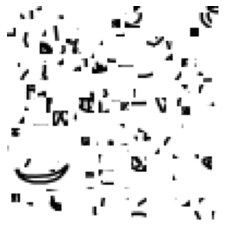

In [16]:
# Displaying some drawing

image = X_train[0]

plt.imshow(image.reshape(100, 100), cmap="binary")
plt.axis('off')
plt.show()

## Implemeting Xception architecture with Squeeze Excitation from scratch


In [17]:
# Creating an SE block

from tensorflow.keras import backend as K

def SqueezeExcite(x, ratio=16):
    
    nb_chan = K.int_shape(x)[-1]

    y = keras.layers.GlobalAveragePooling2D()(x)
    y = keras.layers.Dense(nb_chan // ratio, activation='relu')(y)
    y = keras.layers.Dense(nb_chan, activation='sigmoid')(y)

    y = keras.layers.Multiply()([x, y])
    
    return y

In [18]:
### Building the Convolution Block with an SE block in conv_block part only ###

def conv_block(x, filters, block_num, conv_num, strides=(1,1)):
    
    name = 'block{}_conv{}_'.format(block_num, conv_num)

    # conv-BN-relu
    x = keras.layers.Conv2D(filters, (2,2), strides=(1,1), use_bias=False, 
                            name=name, kernel_regularizer=keras.regularizers.l2(0.01))(x)
    x = SqueezeExcite(x, ratio=16)
    x = keras.layers.BatchNormalization(name=name+'bn')(x)
    x = keras.layers.Activation('relu', name=name+'act')(x)
    x = keras.layers.Dropout(rate=0.2)(x)

    return x

### Building the Separable Convolution Block ###

def separable_conv_block(x, filters, block_num, conv_num, pre_activation=None):
    name = 'block{}_sepconv{}_'.format(block_num, conv_num)

    if pre_activation is True:
        x = keras.layers.Activation('relu', name=name+'act')(x)
        x = keras.layers.Dropout(rate=0.2)(x)

    # (relu)-sepconv-BN-(relu)
    x = keras.layers.SeparableConv2D(filters, (5,5), padding='same', use_bias=False, 
                                     name=name, kernel_regularizer=keras.regularizers.l2(0.01))(x)
    x = keras.layers.BatchNormalization(name=name+'bn')(x)

    if pre_activation is False:
        x = keras.layers.Activation('relu', name=name+'act')(x)
        x = keras.layers.Dropout(rate=0.2)(x)

    return x

### Building the Middle Flow Block ###

def middle_flow_block(x, filters, block_num):

    residual = x

    x = separable_conv_block(x, filters, block_num=block_num, conv_num='1', pre_activation=True)
    x = separable_conv_block(x, filters, block_num=block_num, conv_num='2', pre_activation=True)
    x = separable_conv_block(x, filters, block_num=block_num, conv_num='3', pre_activation=True)

    return keras.layers.add([x, residual])

### building Xception Block ###

def xception_block(x, filters, block_num, pre_activation=True):
    
    block = 'block{}_'.format(block_num)
    filter_conv1, filter_conv2 = filters

    # residual conv branch
    residual = keras.layers.Conv2D(filter_conv2, (1, 1), strides=(2, 2),padding='same', 
                                   use_bias=False, kernel_regularizer=keras.regularizers.l2(0.01))(x)
    residual = keras.layers.BatchNormalization()(residual)

    # separable conv block
    x = separable_conv_block(x, filter_conv1, block_num=block_num, conv_num='1', pre_activation=pre_activation)
    x = separable_conv_block(x, filter_conv2, block_num=block_num, conv_num='2', pre_activation=True)

    # downsampling and merging
    x = keras.layers.MaxPooling2D((5, 5), strides=(2, 2), padding='same', name=block+'pool')(x)

    return keras.layers.add([x, residual])


### Full Xception Model with the 3 parts (Entry flow, Middle flow and Exit flow) ###

def Xception(input_shape=(100,100,1), classes=31):

    img_input = keras.layers.Input(shape=input_shape)

    #===========ENTRY FLOW==============
    # Module 1
    x = conv_block(img_input, 16, block_num='1', conv_num='1', strides=(2,2))
    x = conv_block(x, 32, block_num='1', conv_num='2')

    # Module 2
    x = xception_block(x, (64, 64), '2', pre_activation=False)

    # Module 3
    x = xception_block(x, (128, 128), '3')

    # Module 4
    x = xception_block(x, (364, 364), '4')


    #===========MIDDLE FLOW===============
    for i in range(8):
        block_num = str(5+i)
        x = middle_flow_block(x, 364, block_num)

    #========EXIT FLOW============
    # Module 13
    x = xception_block(x, (364, 512), '13') # second conv is different

    # Module 14
    x = separable_conv_block(x, 768, block_num='14', conv_num='1', pre_activation=False)
    x = separable_conv_block(x, 1024, block_num='14', conv_num='2', pre_activation=False)

    # logistic regression
    x = keras.layers.GlobalAveragePooling2D(name='avg_pool')(x)
    x = keras.layers.Dense(classes, activation='softmax', name='predictions')(x)

    # Create model.
    model = keras.models.Model(inputs=img_input, outputs=x, name='xception')
    
    return model

In [19]:
XceptionModel = Xception()
XceptionModel.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 1) 0                                            
__________________________________________________________________________________________________
block1_conv1_ (Conv2D)          (None, 99, 99, 16)   64          input_1[0][0]                    
__________________________________________________________________________________________________
global_average_pooling2d (Globa (None, 16)           0           block1_conv1_[0][0]              
__________________________________________________________________________________________________
dense (Dense)                   (None, 1)            17          global_average_pooling2d[0][0]   
___________________________________________________________________________________________

##### Performance scheduling

In [20]:
# Multiply the learning rate by a factor whenever the best validation loss does not improve for x (patience) consecutive epochs

tf.random.set_seed(37)
reduce_lr_OnPlateau = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5, verbose=1)

In [21]:
optimizer = keras.optimizers.Adamax(lr=0.01, beta_1=0.9, beta_2=0.999)
XceptionModel.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [22]:
# Fitting the model

Xception_history = XceptionModel.fit(X_train, y_train, epochs=75, validation_data=(X_test, y_test),
                                    callbacks=[reduce_lr_OnPlateau])

Epoch 1/75
250/250 [==============================] - 97s 356ms/step - loss: 5.9851 - accuracy: 0.0597 - val_loss: 3.7652 - val_accuracy: 0.0480
Epoch 2/75
250/250 [==============================] - 88s 351ms/step - loss: 3.1531 - accuracy: 0.1267 - val_loss: 4.2655 - val_accuracy: 0.1050
Epoch 3/75
250/250 [==============================] - 88s 351ms/step - loss: 2.6466 - accuracy: 0.2216 - val_loss: 3.3962 - val_accuracy: 0.1530
Epoch 4/75
250/250 [==============================] - 88s 351ms/step - loss: 2.3908 - accuracy: 0.3016 - val_loss: 4.5955 - val_accuracy: 0.1450
Epoch 5/75
250/250 [==============================] - 88s 354ms/step - loss: 2.1420 - accuracy: 0.3811 - val_loss: 2.3835 - val_accuracy: 0.4065
Epoch 6/75
250/250 [==============================] - 88s 352ms/step - loss: 1.9171 - accuracy: 0.4463 - val_loss: 3.3575 - val_accuracy: 0.3345
Epoch 7/75
250/250 [==============================] - 88s 353ms/step - loss: 1.8604 - accuracy: 0.4801 - val_loss: 2.1528 - val_ac

Epoch 55/75
250/250 [==============================] - 88s 351ms/step - loss: 0.1237 - accuracy: 0.9688 - val_loss: 1.2669 - val_accuracy: 0.7935
Epoch 56/75
250/250 [==============================] - 88s 351ms/step - loss: 0.1077 - accuracy: 0.9676 - val_loss: 1.2929 - val_accuracy: 0.7950
Epoch 57/75
250/250 [==============================] - 87s 350ms/step - loss: 0.1143 - accuracy: 0.9701 - val_loss: 1.3102 - val_accuracy: 0.7880

Epoch 00057: ReduceLROnPlateau reducing learning rate to 0.0003124999930150807.
Epoch 58/75
250/250 [==============================] - 87s 350ms/step - loss: 0.1074 - accuracy: 0.9685 - val_loss: 1.3208 - val_accuracy: 0.7940
Epoch 59/75
250/250 [==============================] - 88s 351ms/step - loss: 0.1010 - accuracy: 0.9745 - val_loss: 1.2838 - val_accuracy: 0.7960
Epoch 60/75
250/250 [==============================] - 88s 351ms/step - loss: 0.0936 - accuracy: 0.9770 - val_loss: 1.2954 - val_accuracy: 0.8005
Epoch 61/75
250/250 [======================

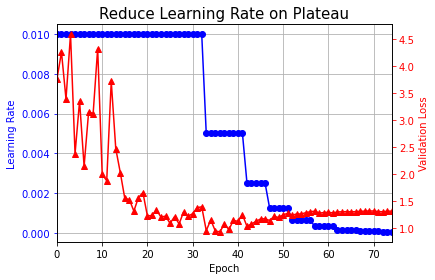

In [23]:
# Displaying the evolution of the learning rate

n_epochs= 75
plt.plot(Xception_history.epoch, Xception_history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(Xception_history.epoch, Xception_history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce Learning Rate on Plateau", fontsize=15)
plt.show()

##### Predicting on the new data for submission

In [24]:
class_pred = np.argmax(XceptionModel.predict(X_newData), axis=-1)
class_pred

array([16, 12, 17, ..., 27, 16,  4], dtype=int64)

In [25]:
Xceptionpred = list(le.inverse_transform(class_pred))
Xceptionpred

['pineapple',
 'pear',
 'pool',
 'pillow',
 'empty',
 'rifle',
 'pool',
 'scorpion',
 'pineapple',
 'rollerskates',
 'paintbrush',
 'pineapple',
 'scorpion',
 'skull',
 'rabbit',
 'pencil',
 'pool',
 'shovel',
 'nose',
 'rifle',
 'sailboat',
 'mug',
 'skateboard',
 'pillow',
 'pool',
 'mouth',
 'rhinoceros',
 'shovel',
 'nose',
 'shovel',
 'pineapple',
 'nail',
 'pencil',
 'octagon',
 'parrot',
 'moustache',
 'rhinoceros',
 'spoon',
 'mouth',
 'apple',
 'moustache',
 'peanut',
 'pool',
 'panda',
 'spoon',
 'pencil',
 'pear',
 'skull',
 'paintbrush',
 'nail',
 'sailboat',
 'moustache',
 'shovel',
 'penguin',
 'rifle',
 'sailboat',
 'paintbrush',
 'skateboard',
 'nose',
 'scorpion',
 'octagon',
 'sailboat',
 'mouth',
 'spoon',
 'pillow',
 'pool',
 'nail',
 'mouth',
 'octagon',
 'pool',
 'screwdriver',
 'shovel',
 'pool',
 'scorpion',
 'penguin',
 'shovel',
 'moustache',
 'pineapple',
 'empty',
 'skateboard',
 'scorpion',
 'pencil',
 'mug',
 'nail',
 'pineapple',
 'panda',
 'octagon',
 'm

In [26]:
# CSV for submission

submission = pd.DataFrame({'Id' : np.arange(len(Xceptionpred)),
                               'Category' : Xceptionpred})
submission.to_csv('Final_Submission.csv', index = False)
submission

,Id,Category
0,0,pineapple
1,1,pear
2,2,sink
3,3,pillow
4,4,empty
...,...,...
9995,9995,mouth
9996,9996,screwdriver
9997,9997,skateboard
9998,9998,pineapple
